# Case study 06 on Pre-processing

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## 1. Load the dataset into python environment

In [2]:
data=pd.read_csv('titanic_dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. Make ‘PassengerId’ as the index column

In [3]:
data.set_index(['PassengerId'],inplace=True)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3. Check the basic details of the dataset

In [4]:
#Finding the shape of the dataset(number of rows and columns) using shape. 
data.shape

(891, 11)

In [5]:
#Finding the column names of our dataset
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
#Finding the datatypes of variables in our dataset
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [7]:
#Finding the presance of null values in our dataset using isna().sum() .
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Age has 177 missing values.
Cabin has 687  missing values.
Embarked has 2 missing values

In [8]:
#Finding the summery for our dataset using info()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [9]:
#Finding statistical values for our dataset
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Plotting Graphs

In [10]:
#Visualization for survived passengers first we will find how many pasengers survived using values_counts().
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

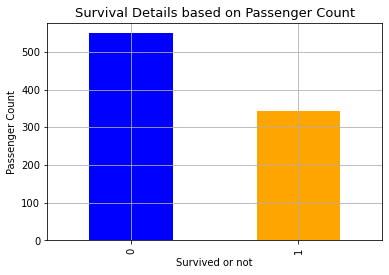

In [11]:
#Plotting bar graph
data.Survived.value_counts().plot(kind='bar',color=['blue','orange'])
plt.title('Survival Details based on Passenger Count', fontsize = 13)
plt.xlabel('Survived or not')
plt.ylabel('Passenger Count')
plt.grid()

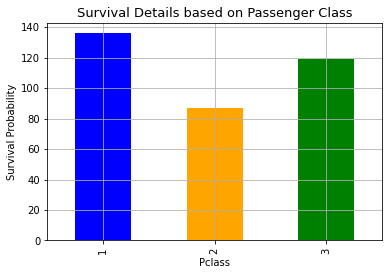

In [12]:
#Plotting bar graph for the probability of survival from plcass
data.groupby('Pclass')['Survived'].sum().plot(kind = 'bar',color=['blue','orange','green'])
plt.title('Survival Details based on Passenger Class', fontsize = 13)
plt.xlabel('Pclass')
plt.ylabel('Survival Probability')
plt.grid()

From the above graph, we can say that,1st class has high chance of surviving than the other two classes.

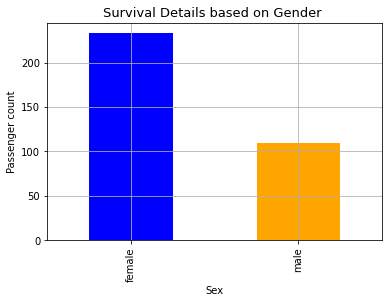

In [13]:
#Plotting bar graph based on the gender 
data.groupby('Sex')['Survived'].sum().plot(kind = 'bar',color=['blue','orange'])
plt.title('Survival Details based on Gender ', fontsize = 13)
plt.xlabel('Sex')
plt.ylabel('Passenger count')
plt.grid()

From the above graph, we can say that, As we see, the survival probaility for Female is more.

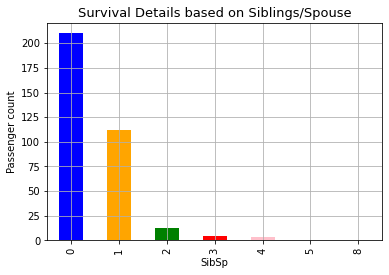

In [14]:
#Plotting bar graph for SibSp - Siblings/Spouse survied rate
data.groupby('SibSp')['Survived'].sum().plot(kind='bar',color=['blue','orange','green','red','pink','black','skyblue'])
plt.title('Survival Details based on Siblings/Spouse', fontsize = 13)
plt.xlabel('SibSp')
plt.ylabel('Passenger count')
plt.grid()

As we can see from the above graph, majority of them have no Siblings/Spouse.

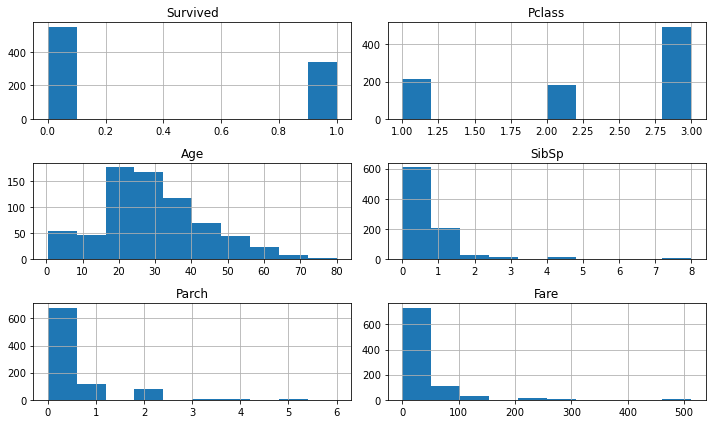

In [15]:
#Freq distribution graph
fgraph=data.select_dtypes(include=['float','int64'])
fgraph.hist(figsize=(10,6))
plt.tight_layout()

## 4. Fill in all the missing values present in all the columns in the dataset

In [16]:
#Checking datatypes of the data
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [17]:
#Checking missing/null values using isna()
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Age has 177,Cabin has 687 and Embarked has 2 Missing values

#### We can remove 'Ticket ' and Name columns because it doesnt contribute to target variable(Survived).'Age' and 'Embarked' has less number of missing value. We have to impute them using different techniques.' Cabin' is a categorical data so if we want to fill missing values  we can use ffill/bfill or we can directly fill using 'unknow '   (data['Cabin'] = data['Cabin'].fillna('Unknown'))   instead of using mode operation because cabin column contains large number of missing value so using mode will not be a good choice but here we just directly dropping cabin column because it has a lot of missing values and also it doesnt contribute to our model .

In [18]:
#Removing columns which are not useful for our target variable Survived.
data.drop(columns=['Name','Ticket','Cabin'],axis=1,inplace=True)

In [19]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [20]:
#Plotting boxplot to check if the data is skewed 

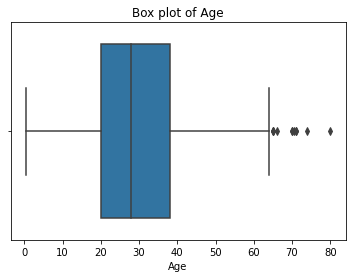

In [21]:
sns.boxplot(data['Age'])
plt.title('Box plot of Age')
plt.show()

#### There are several or large numbers of data points that act as outliers. Outliers data points will have a significant impact on the mean and hence, in such cases, it is not recommended to use the mean for replacing the missing values.Here using mean values for replacing missing values may not create a great model

In [22]:
#Handling missing values in age column

In [23]:
data['Age']=data['Age'].fillna(data['Age'].median())

In [24]:
#Handling missing values in Embarked column (it is a categorical data so we use mode())

In [25]:
emb=['Embarked']
data[emb]=data[emb].fillna(data.mode().iloc[0])

In [26]:
#Checking null values again
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

There are no missing values in the data now.

## 5. Check and handle outliers in at least 3 columns in the dataset

### 1. AGE

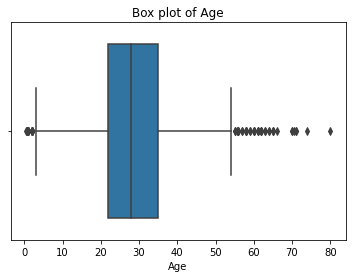

In [27]:
#Checking presence of outliers
sns.boxplot(data['Age'])
plt.title('Box plot of Age')
plt.show()

In [28]:
print('skewness value of Age: ',data['Age'].skew())

skewness value of Age:  0.5102446555756495


In [29]:
#Using IQR method for handling the outlier
Q1=np.percentile(data['Age'],25,interpolation='midpoint')
Q2=np.percentile(data['Age'],50,interpolation='midpoint')
Q3=np.percentile(data['Age'],75,interpolation='midpoint')

In [30]:
print(Q1)
print(Q2)
print(Q3)

22.0
28.0
35.0


In [31]:
IQR=Q3-Q1
print(IQR)

13.0


In [32]:
low_age=Q1-1.5*IQR
up_age=Q3+1.5*IQR
print('low_age=',low_age)
print('up_age=',up_age)

low_age= 2.5
up_age= 54.5


In [33]:
#Data points below and above the limits are considered as outliers

In [34]:
outlier = []
for x in data['Age']:
    if ((x > up_age) or (x < low_age)):
        outlier.append(x)

In [35]:
len(outlier)

66

In [36]:
print(outlier)

[2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 74.0, 56.0]


In [37]:
#Replacing outliers using median

In this technique, we replace the extreme values with median values becaue dropping all the above value cause loss of data. It is advised to not use mean values as they are affected by outliers.Code below replaces all those values in the 'Age' variable, which are greater than the up_Age and lower than low_Age, with the median value.

In [38]:
data.loc[((data['Age'] > up_age) | (data['Age'] < low_age)),'Age'] =data['Age'].median()

In [39]:
print('skewness value of Age: ',data['Age'].skew())

skewness value of Age:  0.1874899776520373


We can see that the skewness is reduced to .18 from .51 after replacing the outlier value with the median value of age.

## 2. SibSp

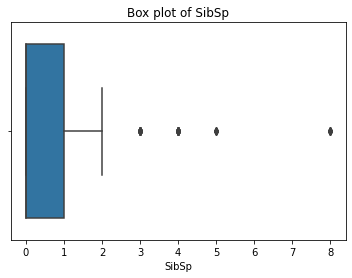

In [40]:
#Checking presence of outliers
sns.boxplot(data['SibSp'])
plt.title('Box plot of SibSp')
plt.show()

We can see that outliers are present in the SibSp column .

In [41]:
print('skewness value of Sibsp: ',data['SibSp'].skew())

skewness value of Sibsp:  3.6953517271630565


In [42]:
#Using IQR method for handling the outlier
Q1=np.percentile(data['SibSp'],25,interpolation='midpoint')
Q2=np.percentile(data['SibSp'],50,interpolation='midpoint')
Q3=np.percentile(data['SibSp'],75,interpolation='midpoint')

In [43]:
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
1.0


In [44]:
IQR=Q3-Q1
print(IQR)

1.0


In [45]:
low_sibsp=Q1-1.5*IQR
up_sibsp=Q3+1.5*IQR
print('low_sibsp=',low_sibsp)
print('up_sibsp=',up_sibsp)

low_sibsp= -1.5
up_sibsp= 2.5


In [46]:
#Data points below and above the limits are considered as outliers and normaly siblings number cant be less than zero .

In [47]:
outlier = []
for x in data['SibSp']:
    if ((x > up_sibsp) or (x < low_sibsp)):
        outlier.append(x)
len(outlier) 

46

In [48]:
print(outlier)

[3, 4, 3, 3, 4, 5, 3, 4, 5, 3, 3, 4, 8, 4, 4, 3, 8, 4, 8, 3, 4, 4, 4, 4, 8, 3, 3, 5, 3, 5, 3, 4, 4, 3, 3, 5, 4, 3, 4, 8, 4, 3, 4, 8, 4, 8]


In [49]:
#Finding the index of the outliers
index1=data['SibSp']>up_sibsp
data.loc[index1].index

Int64Index([  8,  17,  25,  28,  51,  60,  64,  69,  72,  86,  89, 120, 160,
            165, 172, 177, 181, 183, 202, 230, 234, 262, 267, 279, 325, 342,
            375, 387, 410, 481, 486, 542, 543, 635, 643, 684, 687, 727, 788,
            793, 814, 820, 825, 847, 851, 864],
           dtype='int64', name='PassengerId')

In [50]:
#Replacing outliers with median.

In this technique, we replace the extreme values with median values becaue dropping all the above value cause loss of data. It is advised to not use mean values as they are affected by outliers.Code below replaces all those values in the 'SibSp' variable, which are greater than the up_sibsp and lower than low_sibsp, with the median value.

In [51]:
data.loc[((data['SibSp'] > up_sibsp) | (data['SibSp'] < low_sibsp)),'SibSp'] =data['SibSp'].median()

In [52]:
print('skewness value of SibSp: ',data['SibSp'].skew())

skewness value of SibSp:  1.5348392728746048


The skewness reduced from 3.69 to 1.53 .

## 3. Fare

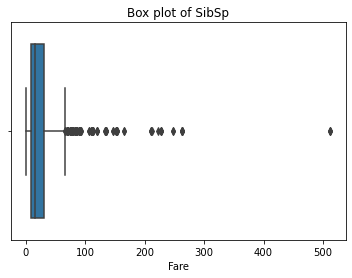

In [53]:
#Checking presence of outliers
sns.boxplot(data['Fare'])
plt.title('Box plot of SibSp')
plt.show()

We can see that outliers are present in the Fare column.

In [54]:
print('skewness value of Fare: ',data['Fare'].skew())

skewness value of Fare:  4.787316519674893


In [55]:
#Using IQR method for handling the outlier
Q1=np.percentile(data['Fare'],25,interpolation='midpoint')
Q2=np.percentile(data['Fare'],50,interpolation='midpoint')
Q3=np.percentile(data['Fare'],75,interpolation='midpoint')

In [56]:
print(Q1)
print(Q2)
print(Q3)

7.9104
14.4542
31.0


In [57]:
IQR=Q3-Q1
print(IQR)

23.0896


In [58]:
low_fare=Q1-1.5*IQR
up_fare=Q3+1.5*IQR
print('low_fare=',low_fare)
print('up_fare=',up_fare)

low_fare= -26.724
up_fare= 65.6344


In [59]:
#Data points below and above the limits are considered as outliers

In [60]:
outlier = []
for x in data['Fare']:
    if ((x > up_fare) or (x < low_fare)):
        outlier.append(x)
len(outlier)  

116

In [61]:
print(outlier)

[71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 69.55, 69.55, 146.5208, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 153.4625, 135.6333, 77.9583, 78.85, 91.0792, 151.55, 247.5208, 151.55, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 69.55, 135.6333, 153.4625, 133.65, 66.6, 134.5, 263.0, 75.25, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 263.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 79.2, 78.2667, 153.4625, 77.9583, 69.3, 76.7292, 73.5, 113.275, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 71.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 69.55, 120.0, 93.5, 80.0, 83.1583, 69.55, 89.1042, 164.8667, 69.55, 83.1583]


In [62]:
#Replacing Outliers with Median Values

In this technique, we replace the extreme values with median values becaue dropping all the above value cause loss of data. It is advised to not use mean values as they are affected by outliers.Code below replaces all those values in the 'Fare' variable, which are greater than the up_fare and lower than low_fare, with the median value.

In [63]:
data.loc[((data['Fare'] > up_fare) | (data['Fare'] < low_fare)),'Fare'] =data['Fare'].median()

In [64]:
print('skewness value of Fare: ',data['Fare'].skew())

skewness value of Fare:  1.6166694717995465


We can see that th skewness of data reduced from 4.78 to 1.61.

In [65]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,28.476992,0.297419,0.381594,17.383622
std,0.486592,0.836071,9.793559,0.521648,0.806057,12.713016
min,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,23.750000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,33.000000,1.000000,0.000000,24.150000
max,1.000000,3.000000,54.000000,2.000000,6.000000,65.000000


## 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [66]:
#One hot encoding for changing the string values to neumerical values .
data=pd.get_dummies(data)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,1,0,0,1
2,1,1,38.0,1,0,14.4542,1,0,1,0,0
3,1,3,26.0,0,0,7.9250,1,0,0,0,1
4,1,1,35.0,1,0,53.1000,1,0,0,0,1
5,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [67]:
y=data['Survived']

In [68]:
x=data.drop('Survived', axis=1)

In [69]:
x.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,28.476992,0.297419,0.381594,17.383622,0.352413,0.647587,0.188552,0.086420,0.725028
std,0.836071,9.793559,0.521648,0.806057,12.713016,0.477990,0.477990,0.391372,0.281141,0.446751
min,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,23.750000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,0.000000,1.000000
75%,3.000000,33.000000,1.000000,0.000000,24.150000,1.000000,1.000000,0.000000,0.000000,1.000000
max,3.000000,54.000000,2.000000,6.000000,65.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [70]:
#Applying minmax scaling
#Importing the MinMaxScaler
from sklearn import preprocessing
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))

In [71]:
from pandas import DataFrame
x =min_max.fit_transform(x)
x = pd.DataFrame(x)
x.describe()

,0,1,2,3,4,5,6,7,8,9
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.654321,0.499549,0.148709,0.063599,0.267440,0.352413,0.647587,0.188552,0.086420,0.725028
std,0.418036,0.192031,0.260824,0.134343,0.195585,0.477990,0.477990,0.391372,0.281141,0.446751
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.406863,0.000000,0.000000,0.121698,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.490196,0.000000,0.000000,0.222372,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,0.588235,0.500000,0.000000,0.371538,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [72]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state = 42, test_size = 0.2)
from sklearn import linear_model
lr = linear_model.LinearRegression()
model=lr.fit(xtrain, ytrain)
predictions= model.predict(xtest)

In [73]:
#Calculating mse
from sklearn.metrics import mean_squared_error
print('MSE =', mean_squared_error(ytest, predictions))

MSE = 0.14255297971035377


In [74]:
from sklearn.metrics import r2_score
print('R squared =', r2_score(ytest, predictions))

R squared = 0.4121570112098526


Our MSE is  0.14255297971035377  and R squared values is 0.4121570112098526 we can say that our model is ok tp use.